<a href="https://colab.research.google.com/github/aditi-138/MovieReviewAnalysis/blob/main/BinarySentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries
Loading the dataset(It is already preprocessed and prelabeled and the reviews have been given an integer value)


In [ ]:
import numpy as np
import matplotlib
import sklearn
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)
#x_train and x_test stores the reviews already mapped into integers
#y_train and y_test both store 0 and 1 labels for positive and negative reviews

Preprocess the data and bring them to a uniform length(method used here:padding) Padding is a method to pad shorter words with 0 to bring to the max length as decided by the user and longer words are truncated


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len=256
x_train=pad_sequences(x_train,maxlen=max_len)
x_test=pad_sequences(x_test,maxlen=max_len)
print(x_train.shape)
print(x_test.shape)

(25000, 256)
(25000, 256)


Building the model

In [ ]:
from tensorflow.keras.models import Sequential
#Sequential model used here to add stack of layers by add()
from tensorflow.keras.layers import Embedding,LSTM,Dense
#Embedding:converting the data into dense vector
#LSTM:Model learns
#Dense:Connects the layers and decision making
vocab=10000
model=Sequential([
    Embedding(input_dim=vocab,output_dim=128),
    LSTM(64,dropout=0.2,recurrent_dropout=0.2),
    Dense(1,activation='sigmoid'),

])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#train the model
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))
model.summary()
#gives the textual representation of the model



Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 123s 154ms/step - accuracy: 0.7026 - loss: 0.5583 - val_accuracy: 0.8291 - val_loss: 0.3992
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 148s 162ms/step - accuracy: 0.8595 - loss: 0.3429 - val_accuracy: 0.8321 - val_loss: 0.3884
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 133s 151ms/step - accuracy: 0.8844 - loss: 0.2946 - val_accuracy: 0.8355 - val_loss: 0.3861
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 151ms/step - accuracy: 0.8901 - loss: 0.2776 - val_accuracy: 0.7826 - val_loss: 0.4508
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 120s 153ms/step - accuracy: 0.8815 - loss: 0.2901 - val_accuracy: 0.8306 - val_loss: 0.4082
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 149ms/step - accuracy: 0.9089 - loss: 0.2334 - val_accuracy: 0.8519 - val_loss: 0.3974
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 145s 153ms/step - accuracy: 0.9205 - loss: 0.2052 - val_accuracy: 0.8488 - val_loss: 0.4210
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 148s 161ms/step - accuracy: 0.9353 -

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 256, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,988,421 (15.21 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,658,948 (10.14 MB)

Evaluate the model accuracy


In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Test Accuracy:{test_acc*100:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.8481 - loss: 0.5105
Test Accuracy:85.12


Prediction


In [ ]:
review=["BEST MOVIE EVER WATCHED","Worst movie","I will never watch again"]#Enter a review
#Preprocess the new review to fit the size and other necessities
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
tokenizer=imdb.get_word_index()
tokenizer=Tokenizer(num_words=10000)
word_index=imdb.get_word_index()
for r in review:
                encoded_review=[[word_index.get(word.lower(), 0) for word in r.split()]]
                encoded_review=pad_sequences(encoded_review,maxlen=max_len)
                prediction=model.predict(encoded_review)
                print(prediction)
                print("Sentiment:","Positive" if prediction[0][0]>0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
[[0.37281448]]
Sentiment: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.50369567]]
Sentiment: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.26888266]]
Sentiment: Negative


Visualization

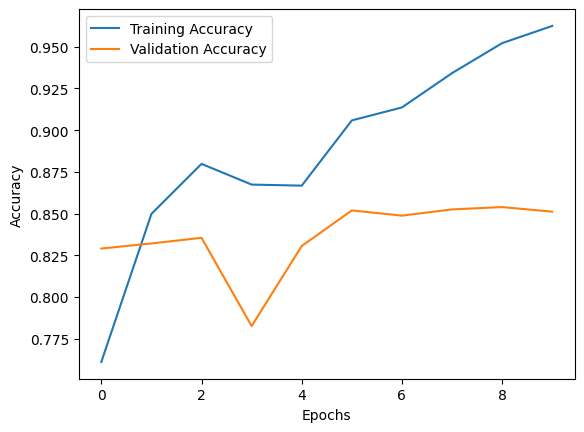

In [ ]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
